0. [Import Libraries](#0.-Import-Libraries)
1. [Import Data](#1.-Import-Data)
2. [Data Exploration](#2.-Data-Exploration)
3. [Data Preparation](#4.-Data-Preparation)

# 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Visualisation / EDA
import matplotlib.pyplot as plt
import seaborn as sns
# Plot style
sns.set_style('darkgrid')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# 1. Import Data

In [2]:
taxi_jan_2019 = pd.read_csv('data/yellow_tripdata_2019-01.csv')
# Create new concat dataframe for future data
df = pd.concat([taxi_jan_2019])

Sample dataset:

In [3]:
print(f"Column shape: {df.shape}\n")
df.head()

Column shape: (7667792, 18)



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


# 2. Data Exploration

Get more information about the dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,2.811814e+06
mean,1.636775e+00,1.567078e+00,2.801084e+00,1.058371e+00,1.655009e+02,1.637529e+02,1.291776e+00,1.240941e+01,3.280394e-01,4.968458e-01,1.827367e+00,3.169187e-01,2.993382e-01,1.568222e+01,3.289691e-05
std,5.398204e-01,1.224431e+00,3.737529e+00,6.780889e-01,6.639180e+01,7.036445e+01,4.733229e-01,2.620721e+02,5.074789e-01,5.337843e-02,2.501213e+00,2.023665e+00,1.911711e-02,2.622932e+02,9.068695e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.430000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.330000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00


In [6]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [7]:
# Select columns to keep 
df = df[[
    'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
    'PULocationID', 'DOLocationID', 'payment_type', 'total_amount'
]]

In [8]:
# View changes to columns
df.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95


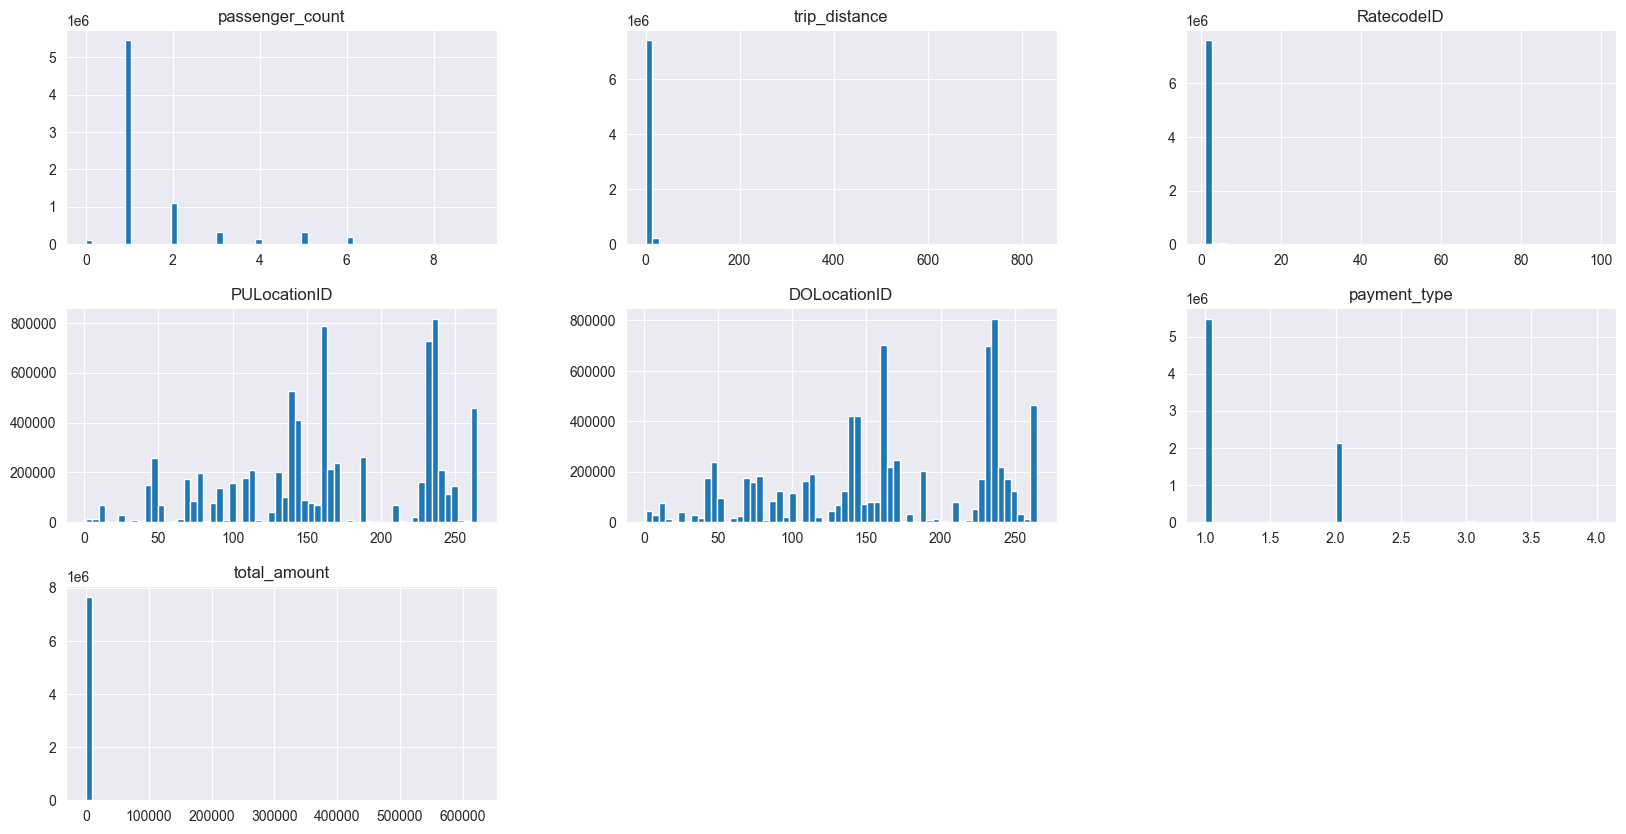

In [9]:
df.hist(figsize=(20, 10), bins=60)
plt.show()

`payment_type` and `RatecodeID` require further investgiation.

In [10]:
# All values in RatecodeID 
df['RatecodeID'].value_counts()

RatecodeID
1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: count, dtype: int64

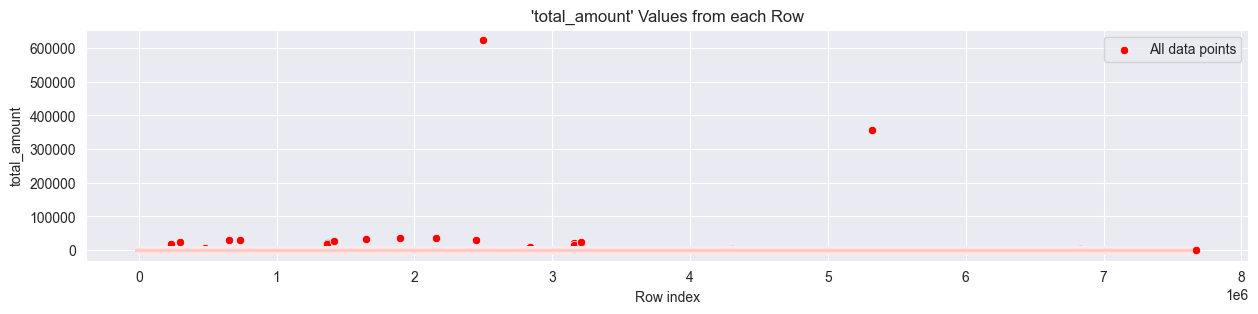

In [11]:
# total_amount data points by row index
plt.figure(figsize=(15, 3))
plt.title(F"'total_amount' Values from each Row")
sns.scatterplot(data=df.reset_index(), x='index', y='total_amount', label='All data points', color='red')
plt.xlabel('Row index')
plt.legend()
plt.show()

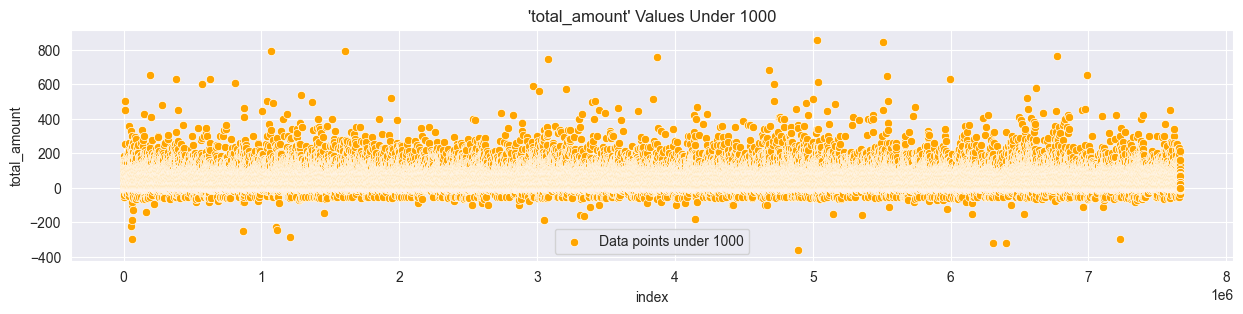

In [12]:
# total_amount data points under 1000
under_1000 = df[df['total_amount'] < 1000]

plt.figure(figsize=(15, 3))
plt.title(f"'total_amount' Values Under 1000")
sns.scatterplot(data=under_1000.reset_index(), x='index', y='total_amount', label='Data points under 1000', color='orange')
plt.legend()
plt.show()

Looks like there are negative values in `total_amount` which is invalid. 

Total of negative values in total_amount: 7131



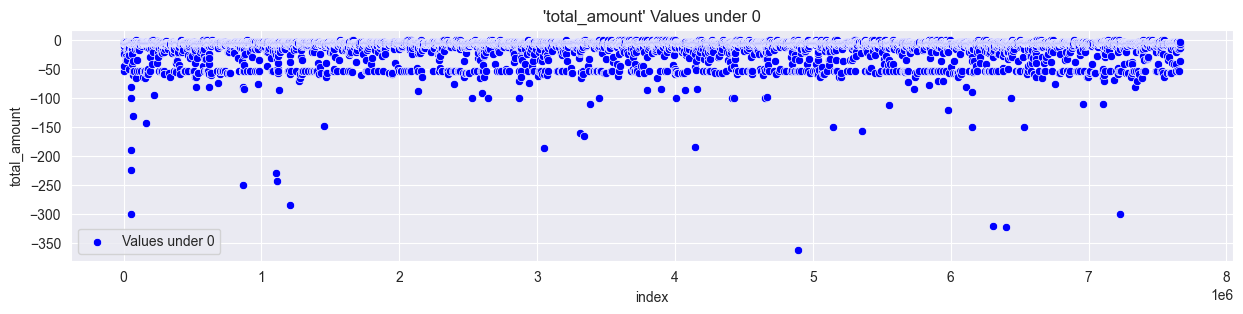

In [13]:
under_0 = df[df['total_amount'] < 0]
print(f"Total of negative values in total_amount: {under_0.shape[0]}\n")

plt.figure(figsize=(15, 3))
plt.title("'total_amount' Values under 0")
sns.scatterplot(data=under_0.reset_index(), x='index', y='total_amount', label='Values under 0', color='blue')
plt.legend()
plt.show()

In [14]:
under_0.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


Taking a closer look at the `payment_type` column, most of the values are either a 3 or 4 which indicates a dispute **[4]** or no charge was made **[3]**.

In [15]:
under_0['payment_type'].value_counts()

payment_type
3    4088
4    2666
2     376
1       1
Name: count, dtype: int64

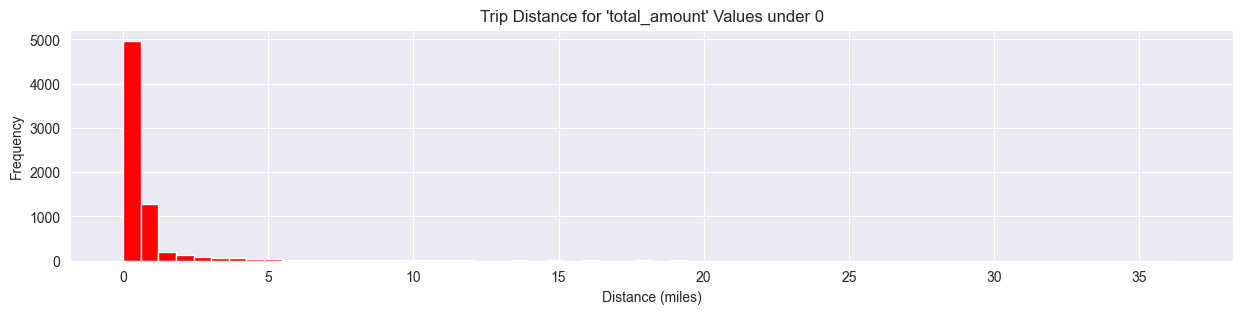

In [16]:
plt.title("Trip Distance for 'total_amount' Values under 0")
under_0['trip_distance'].hist(bins=60, figsize=(15, 3), color='red')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

In [17]:
df_filter = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)]

In [18]:
# Group RatecodeID by average trip_distance / total_amount
df_filter.groupby(['RatecodeID'])[['trip_distance', 'total_amount']].mean()

# 1. Standard rate
# 2. JFK
# 3. Newark
# 4. Nassau or Westchester
# 5. Negotiated fare
# 6. Group ride

,trip_distance,total_amount
RatecodeID,,
1,2.433326,14.089460
2,17.364842,66.505276
3,17.390954,92.087835
4,18.616503,81.676771
5,10.940134,49.706887
6,1.110625,420.038125
99,2.008302,12.443396


99 is an invalid value.

In [19]:
# Group payment_type by average total_amount 
df_filter.groupby(['payment_type'])[['total_amount']].mean()

# 1. Credit card
# 2. Cash
# 3. No charge
# 4. Dispute
# 5. Unknown
# 6. Voided trip

,total_amount
payment_type,
1,16.556551
2,12.596317
3,40.318085
4,15.485097


In this next part I'll be looking for errors / anomalies during recording the duration of each trip. I'll repeat these steps during preprocessing.

In [20]:
# Convert pickup / dropoff columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [21]:
# Add duration column — convert timedelta object to list
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).astype(str).str.split(' ')

In [22]:
# Check if 'duration' values are valid — starting with the 'day' value
df[(df['duration'].apply(lambda x: int(x[0]) > 1)) | (df['duration'].apply(lambda x: int(x[0]) < 0))]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,duration
68268,2019-01-01 07:01:20,2019-01-31 14:29:21,1,1.2,1,48,163,2,7.30,"[30, days, 07:28:01]"
592225,2019-01-03 22:24:36,2019-01-27 10:41:17,1,1.1,1,50,170,1,11.15,"[23, days, 12:16:41]"
875806,2019-01-05 04:21:40,2019-01-27 01:53:46,2,3.9,1,114,237,1,21.35,"[21, days, 21:32:06]"
1203127,2019-01-06 15:15:08,2018-11-09 02:34:38,1,3.3,1,100,79,2,16.80,"[-59, days, +11:19:30]"
2976251,2019-01-13 15:15:27,2018-12-25 07:37:43,3,7.6,1,164,145,2,36.06,"[-20, days, +16:22:16]"
3715690,2019-01-16 15:31:14,2019-01-21 15:22:08,1,0.0,99,265,265,2,1079.40,"[4, days, 23:50:54]"
4741726,2019-01-20 15:15:30,2019-01-18 15:57:16,1,1.9,1,186,162,1,19.55,"[-2, days, +00:41:46]"
5175736,2019-01-22 16:34:14,2019-01-22 16:33:14,1,0.0,1,265,265,2,3.77,"[-1, days, +23:59:00]"


Theses rows have errors with dropoff / pickup times. The duration of a trip should not last 30 days lol

In [23]:
# Check for values over 3 hours in duration
hour_over_03 = df[df['duration'].apply(lambda x: int(x[-1].split(':')[0])) > 3]

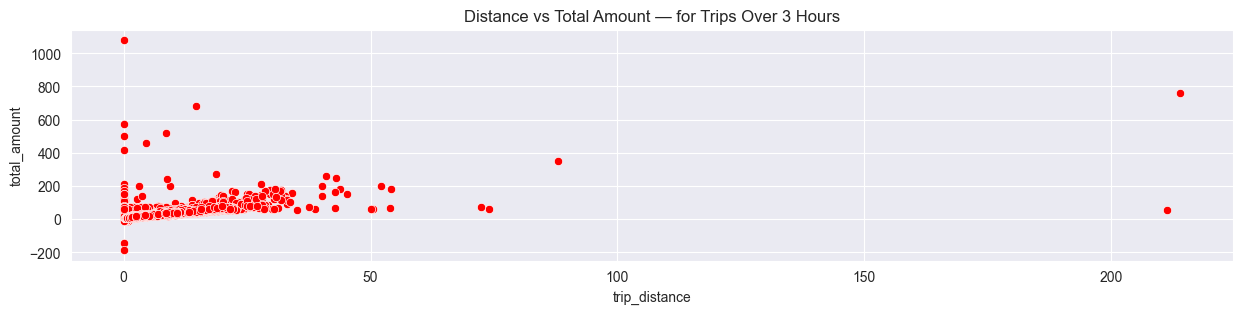

In [24]:
plt.figure(figsize=(15, 3))
plt.title('Distance vs Total Amount — for Trips Over 3 Hours')
sns.scatterplot(data=hour_over_03, x='trip_distance', y='total_amount', color='red')
plt.show()

In [25]:
hour_over_03[hour_over_03['trip_distance'] == 0].head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,duration
13272,2018-11-28 17:05:35,2018-11-29 10:05:34,5,0.0,1,193,193,2,500.55,"[0, days, 16:59:59]"
41579,2019-01-01 02:02:47,2019-01-02 01:56:58,1,0.0,3,152,152,2,20.80,"[0, days, 23:54:11]"
57531,2019-01-01 04:19:50,2019-01-02 03:43:51,1,0.0,5,265,265,1,213.02,"[0, days, 23:24:01]"
86663,2018-12-31 19:49:51,2019-01-01 12:54:47,1,0.0,1,69,264,2,36.30,"[0, days, 17:04:56]"
119678,2019-01-01 10:41:46,2019-01-01 15:13:32,1,0.0,5,265,68,1,81.60,"[0, days, 04:31:46]"


Exploring this data further confirms that some `total_amount` and `trip distance` values are inaccurate. This could be due to an error with the taximeter or something else.

In [26]:
# Rows with a duration of 15 hours or more
df[(df['duration'].apply(lambda x: int(x[-1].split(':')[0]) >= 15))].shape

(19737, 10)

In [27]:
# Drop duration column for now
df.drop(['duration'], axis=1, inplace=True)

# 3. Data Preparation

In [28]:
def preprocessing(dataframe):
    # Copy dataframe
    X = dataframe.copy()
    
    # Cast pickup / dropoff to datetime
    X['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    X['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    # Add duration column — convert timedelta object to list for formatting
    X['duration'] = (X['tpep_dropoff_datetime'] - X['tpep_pickup_datetime']).astype(str).str.split(' ')
    # Remove values that are greater than 1, or less than 0 days from duration
    X = X[~((X['duration'].apply(lambda x: int(x[0]) >= 1)) | (X['duration'].apply(lambda x: int(x[0]) < 0)))]
    # Remove values with a duration over 1 hour and trip_distance of 0
    X = X[~((X['duration'].apply(lambda x: int(x[-1].split(':')[0]) > 1)) & (X['trip_distance'] == 0))]
    
    # Remove values that are greater than 200 from total_amount
    X = X[(X['total_amount']) > 0 & (X['total_amount'] <= 200)]
    # Remove values with 99 from RatecodeID 
    X = X[X['RatecodeID'] != 99]
    
    # Add datetime columns
    X['transaction_date'] = pd.to_datetime(X['tpep_pickup_datetime'].dt.date)
    X['transaction_year'] = X['tpep_pickup_datetime'].dt.year
    X['transaction_month'] = X['tpep_pickup_datetime'].dt.month
    X['transaction_day'] = X['tpep_pickup_datetime'].dt.day
    X['transaction_hour'] = X['tpep_pickup_datetime'].dt.hour
    # Remove values from transaction_year that aren't from 2019, and values from transaction_month that aren't from January [1]
    X = X[(X['transaction_year'] == 2019) & (X['transaction_month'] == 1)]
    
    # Cast categorical columns as str instead of int 
    X['RatecodeID'] = X['RatecodeID'].astype(str)
    X['payment_type'] = X['payment_type'].astype(str)
    X['PULocationID'] = X['PULocationID'].astype(str)
    X['DOLocationID'] = X['DOLocationID'].astype(str)
    
    return X

In [29]:
df_filtered = preprocessing(df)

In [30]:
print(f"New df: {df_filtered.shape[0]}, old df: {df.shape[0]}")

New df: 7658256, old df: 7667792


In [31]:
df_filtered.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,duration,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,"[0, days, 00:06:40]",2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,"[0, days, 00:19:12]",2019-01-01,2019,1,1,0
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,163,229,1,9.05,"[0, days, 00:07:09]",2019-01-01,2019,1,1,0
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,229,7,1,18.50,"[0, days, 00:13:38]",2019-01-01,2019,1,1,0
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,141,234,1,13.00,"[0, days, 00:12:00]",2019-01-01,2019,1,1,0


In [33]:
# Numerical columns
num_cols = df_filtered.select_dtypes(include=np.number).columns
# Categorical columns
cat_cols = df_filtered.select_dtypes(include='object').columns